
The world cup dataset:
   Year          Host  Teams   Champion    Runner-Up  \
0  2022         Qatar     32  Argentina       France   
1  2018        Russia     32     France      Croatia   
2  2014        Brazil     32    Germany    Argentina   
3  2010  South Africa     32      Spain  Netherlands   
4  2006       Germany     32      Italy       France   

                              TopScorrer  Attendance  AttendanceAvg  Matches  
0                      Kylian Mbappé - 8     3404252          53191       64  
1                         Harry Kane - 6     3031768          47371       64  
2                    James Rodríguez - 6     3429873          53592       64  
3  Wesley Sneijder, Thomas Müller... - 5     3178856          49670       64  
4                     Miroslav Klose - 5     3352605          52384       64  

Summary statistics of the dataset:
              Year      Teams    Attendance  AttendanceAvg    Matches
count    22.000000  22.000000  2.200000e+01      22.000000 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


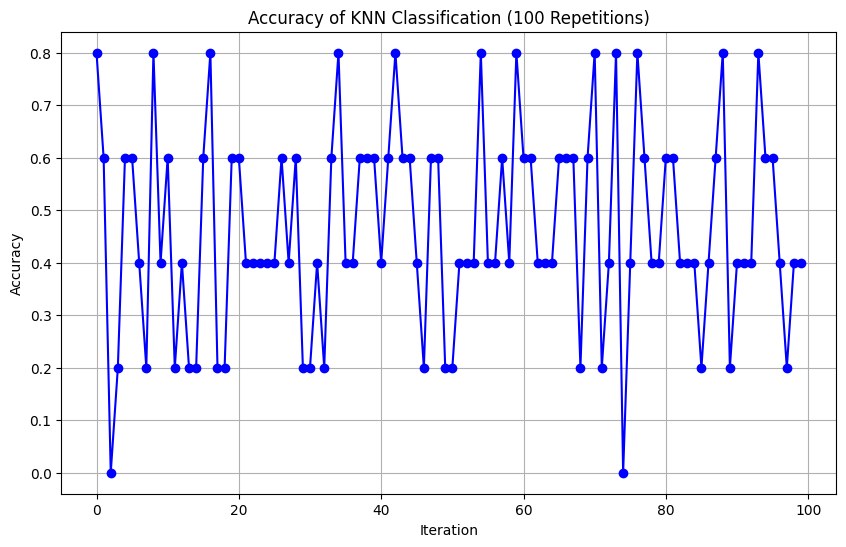

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt


data = pd.read_csv('/content/world_cup.csv')

print("\nThe world cup dataset:")
print(data.head())

print("\nSummary statistics of the dataset:")
print(data.describe())

print(f'\nShape of the dataset: {data.shape}')


X = data.drop('Teams', axis=1)
y = data['Teams']


print("\nData types of features:")
print(X.dtypes)

if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)


X = pd.get_dummies(X)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

accuracy_results = []


for _ in range(100):

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=None)


    model = KNeighborsClassifier()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_results.append(accuracy)


average_accuracy = sum(accuracy_results) / len(accuracy_results)
print(f'\nAverage Accuracy: {average_accuracy}')

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("\nClassification Report:")
print(classification_report(y_test, predictions))

plt.figure(figsize=(10, 6))
plt.plot(accuracy_results, marker='o', linestyle='-', color='b')
plt.title('Accuracy of KNN Classification (100 Repetitions)')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# New Section